## Unsupervised K-Means Clustering Algorithm Applied to Financial Data
In this notebook we will apply an unsupervised machine learning technique - called K-Means clustering - to group a set of stocks into clusters based on their similarities. The clustering algorithm is fit to a cross-sectional  data set that contains fundamental financial data for the top 50 stocks in New Zealand by market capitalisation, and the equity market of interest for this research notebook is the NZX stock exchange. The data set was obtained using the yahoo finance API, with the data downloaded on 16/01/2021.

The purpose of this research notebook is to introduce a powerful, yet simple, machine learning algorithm that can partition an unstructured data set into different clusters (or groups) based on their commonalities. This is an effective technique for finding patterns and themes in a complex data set.

In theory, clustering can be used as a pre-processing step in finding co-integrated stocks for statistical-arbitrage/mean-reverting pairs-trading strategies. By grouping similar stocks into clusters, the amount of computational resources/time taken to perform co-integration tests for every single pair of stocks is reduced. This is due to the much smaller number of pairs combinations to calculate. However, this is beyond the scope of this research notebook.

### 1. Data Pre-Processing & Exploration
Let's start by loading in the necessary libraries and importing the data set.

In [104]:
# Data manipulation and mathematical operations
import pandas as pd
import numpy as np
import yfinance as yf

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the style of all of our plots
plt.style.use('dark_background') 
plt.rcParams['axes.grid'] = False

import warnings
warnings.filterwarnings('ignore')

In [105]:
# Import fundamental dataset for NZX50 companies
df = pd.read_csv('yf_nzx50.csv')

# Printing a list of all of the columns in our data set
print(df.columns.to_list())

['Unnamed: 0', 'zip', 'sector', 'fullTimeEmployees', 'longBusinessSummary', 'city', 'phone', 'country', 'companyOfficers', 'website', 'maxAge', 'address1', 'fax', 'industry', 'address2', 'previousClose', 'regularMarketOpen', 'twoHundredDayAverage', 'trailingAnnualDividendYield', 'payoutRatio', 'volume24Hr', 'regularMarketDayHigh', 'navPrice', 'averageDailyVolume10Day', 'totalAssets', 'regularMarketPreviousClose', 'fiftyDayAverage', 'trailingAnnualDividendRate', 'open', 'toCurrency', 'averageVolume10days', 'expireDate', 'yield', 'algorithm', 'dividendRate', 'exDividendDate', 'beta', 'circulatingSupply', 'startDate', 'regularMarketDayLow', 'priceHint', 'currency', 'trailingPE', 'regularMarketVolume', 'lastMarket', 'maxSupply', 'openInterest', 'marketCap', 'volumeAllCurrencies', 'strikePrice', 'averageVolume', 'priceToSalesTrailing12Months', 'dayLow', 'ask', 'ytdReturn', 'askSize', 'volume', 'fiftyTwoWeekHigh', 'forwardPE', 'fromCurrency', 'fiveYearAvgDividendYield', 'fiftyTwoWeekLow', 'b

In [106]:
# Renaming the first column of dataframe
df = df.rename(columns={df.columns[0]: 'ticker'})

# Inspecting the first 5 rows of our data set
df.iloc[:5,:]

,ticker,zip,sector,fullTimeEmployees,longBusinessSummary,city,phone,country,companyOfficers,website,maxAge,address1,fax,industry,address2,previousClose,regularMarketOpen,twoHundredDayAverage,trailingAnnualDividendYield,payoutRatio,volume24Hr,regularMarketDayHigh,navPrice,averageDailyVolume10Day,totalAssets,...,priceToBook,heldPercentInsiders,nextFiscalYearEnd,mostRecentQuarter,shortRatio,sharesShortPreviousMonthDate,floatShares,enterpriseValue,threeYearAverageReturn,lastSplitDate,lastSplitFactor,legalType,lastDividendDate,morningStarOverallRating,earningsQuarterlyGrowth,dateShortInterest,pegRatio,lastCapGain,shortPercentOfFloat,sharesShortPriorMonth,impliedSharesOutstanding,category,fiveYearAverageReturn,regularMarketPrice,logo_url
0,AIA.NZ,2022,Industrials,527.0,Auckland International Airport Limited provide...,Manukau,64 9 275 0789,New Zealand,[],http://www.aucklandairport.co.nz,1,4 Leonard Isitt Drive,64 9 275 4927,Airports & Air Services,Auckland Airport Business District,7.500,7.500,7.128214,0.029733,0.7421,NaN,7.530,NaN,1130374,NaN,...,1.633015,0.18110,1656547200,1593475200,NaN,NaN,1205724871,12340076544,NaN,1.396483e+09,9:10,NaN,1.584490e+09,NaN,-0.876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.500,https://logo.clearbit.com/aucklandairport.co.nz
1,AIR.NZ,1010,Industrials,9988.0,Air New Zealand Limited provides passenger and...,Auckland,64 9 336 2400,New Zealand,[],http://www.airnewzealand.co.nz,1,Air New Zealand House,64 9 336 2401,Airlines,185 Fanshawe Street,1.675,1.695,1.525893,0.065672,NaN,NaN,1.720,NaN,1591966,NaN,...,1.456559,0.52798,1656547200,1593475200,NaN,NaN,521466669,5183005184,NaN,1.093306e+09,1:05,NaN,1.583885e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.695,https://logo.clearbit.com/airnewzealand.co.nz
2,ANZ.NZ,3008,Financial Services,37506.0,Australia and New Zealand Banking Group Limite...,Melbourne,61 3 9683 9999,Australia,[],http://www.anz.com.au,1,ANZ Centre Melbourne,NaN,Banks—Diversified,Level 9 833 Collins Street Docklands,26.720,26.740,21.473429,0.064633,0.8661,NaN,26.800,NaN,33186,NaN,...,1.187497,0.00337,1664496000,1601424000,NaN,NaN,2796993749,75082514432,NaN,NaN,NaN,NaN,1.604794e+09,NaN,-0.269,NaN,NaN,NaN,NaN,NaN,2.845540e+09,NaN,NaN,26.740,https://logo.clearbit.com/anz.com.au
3,ARG.NZ,1010,Real Estate,NaN,Argosy Property Limited in properties in New Z...,Auckland,64 9 304 3400,New Zealand,[],http://www.argosy.co.nz,1,39 Market Place,64 9 302 0996,REIT—Diversified,Level 1 Viaduct Harbour,1.530,1.540,1.401928,0.041830,0.3366,NaN,1.555,NaN,355890,NaN,...,1.176018,0.02117,1648684800,1585612800,NaN,NaN,816185382,2084581120,NaN,NaN,NaN,NaN,1.607299e+09,NaN,-0.369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.540,https://logo.clearbit.com/argosy.co.nz
4,ARV.NZ,1010,Healthcare,2600.0,"Arvida Group Limited, together with its subsid...",Auckland,64 9 972 1180,New Zealand,[],http://www.arvida.co.nz,1,39 Market Place,NaN,Medical Care Facilities,Level 1 Viaduct Basin,1.740,1.740,1.679429,0.030460,0.8538,NaN,1.740,NaN,312114,NaN,...,1.250904,0.14659,1648684800,1601424000,NaN,NaN,468541461,1300454272,NaN,NaN,NaN,NaN,1.606694e+09,NaN,-0.070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.740,https://logo.clearbit.com/arvida.co.nz


Let's run some simple print statements to visualise the location of the headquarters (by country, and then by city) of each stock in our data set, and the sectors and industries that these companies operate in.

In [107]:
print(df.groupby('country').count().sort_values('ticker', ascending = False)['ticker'].to_frame())
print(df.groupby('city').count().sort_values('ticker', ascending = False)['ticker'].to_frame())
print(df.groupby('sector').count().sort_values('ticker', ascending = False)['ticker'].to_frame())
print(df.groupby('industry').count().sort_values('ticker', ascending = False)['ticker'].to_frame())

             ticker
country            
New Zealand      45
Australia         3
              ticker
city                
Auckland          29
Wellington         7
Christchurch       3
Tauranga           2
Docklands          1
Manukau            1
Melbourne          1
Penrose            1
Rakaia             1
Sydney             1
Whangarei          1
                        ticker
sector                        
Real Estate                  8
Utilities                    7
Healthcare                   6
Industrials                  6
Consumer Cyclical            4
Consumer Defensive           4
Financial Services           4
Communication Services       3
Technology                   3
Energy                       2
Basic Materials              1
                                       ticker
industry                                     
Utilities—Renewable                         4
Medical Care Facilities                     4
Farm Products                               3
REIT—Diversifi

#### Highlights of these results:

- 45 of the NZX-listed companies in our sample are headquartered in New Zealand, while 3 are headquarted in Australia.
- 29 companies are headquarted in Auckland (New Zealand's largest city by population and private-sector activity), 7 companies are headquartered in Wellington (New Zealand's capital city), 3 in Christchurch and 2 in Tauranga. 
- The Real Estate sector has the highest number of publicly-listed companies (8), followed by the Utilities sector (7), Healthcare (6), and Industrials (6). At the other end of the scale, there is only 1 publicly-listed company in the Basic Materials sector, and 2 in the Energy Sector.
- In terms of industry, 4 companies operate in the Renewable-Utilities industry, 4 companies in Medical Care Facilities, 3 in Farm Products, and 3 in the REIT industry (Real Estate Investment Trust).
- New Zealand has 1 publicly-listed company operating in the Airlines industry, which is Air New Zealand (AIR.NZ).

In [113]:
# Creating a new dataframe for our clustering algorithm
df_new = pd.DataFrame()

# Specifying a subset of variables to use for our algorithm
features = ['enterpriseValue', 'trailingEps', 'priceToBook', 'bookValue', 'profitMargins',
           'marketCap', '52WeekChange', 'beta', 'ticker']

# Merging empty dataframe with selected variables
df_new = df[features]
df_new.set_index('ticker') # Set index to 'ticker'

,enterpriseValue,trailingEps,priceToBook,bookValue,profitMargins,marketCap,52WeekChange,beta
ticker,,,,,,,,
AIA.NZ,12340076544,0.152,1.633015,4.507,0.34774,10837967872,-0.155881,0.935137
AIR.NZ,5183005184,-0.404,1.456559,1.174,-0.09388,3840010240,-0.437919,1.617977
ANZ.NZ,75082514432,2.289,1.187497,22.299,0.24008,75408416768,-0.002985,0.966802
ARG.NZ,2084581120,0.144,1.176018,1.301,0.98513,1275669632,0.062500,0.760469
ARV.NZ,1300454272,0.072,1.250904,1.383,0.23176,938504256,-0.069519,0.691011
ATM.NZ,7197559808,0.521,7.110241,1.533,0.22288,8108367872,-0.318551,-0.086823
CEN.NZ,7753632256,0.174,2.517808,3.650,0.06030,6599632384,0.180481,0.487742
CNU.NZ,6895725056,0.100,3.983701,2.086,0.05422,3693728768,0.231939,0.119509
EBO.NZ,4673800192,0.985,3.652968,7.884,0.01854,4690857472,0.181781,0.277323


Now, we have our final dataframe that we will use for our K-Means clustering algorithm. The enterprise value, trailing eps, price to book, book value, profit margins, and market cap features have been selected to provide the algorithm with information about the key financial results, metrics, and size of each respective company. The 52 week change and beta features have been selected to provide the algorithm with information about the stock market profile of each company in terms of returns, volatility, and momentum. 

Before we proceed with our research, we need to address the 1 NaN value in our dataframe (as NaN values are not compatible with our model and our python script will throw an error). We don't particularly want to remove the entire OCA.NZ row from our dataset, so let's fill OCA.NZ's NaN beta value with the average beta of all of the stocks our dataset. While this is not a perfect solution to the problem, it allows us to keep the OCA.NZ variable while likely getting close to OCA.NZ's actual beta value. Its important to note that this is only one observation that we are imputing with the mean value. Therefore, even if our beta estimate is slightly skewed, it will not have an effect on the clusters of the other variables and is highly unlikely to change the cluster designation for the OCA.NZ variable.

In [115]:
# Imputing the mean beta value for the OCA.NZ NaN observation
df_new = df_new.fillna(df_new['beta'].mean()) # There is only 1 NaN in the dataframe so we can use the fillna method on the whole dataframe
df_new = df_new.set_index('ticker')
df_new.iloc[25] # Inspecting OCA to see if the NaN value has been ammended

enterpriseValue    1.234788e+09
trailingEps       -6.000000e-03
priceToBook        1.405508e+00
bookValue          1.053000e+00
profitMargins     -1.825000e-02
marketCap          9.100402e+08
52WeekChange       1.450383e-01
beta               6.912197e-01
Name: OCA.NZ, dtype: float64

Now that we've properly processed and prepared our data, let's proceed and start building our unsupervised machine learning algorithm.

### 2. Machine Learning Modelling: K-Means Clustering
In this section we will start by standardising our data using Sklearn's StandardScaler function. We will then utilise the "elbow-method" to determine the optimal value of k (where k = clusters) for our algorithm. Finally, we will fit a K-Means clustering algorithm to our data set and evaluate the results.

In [17]:
# Importing necessary libraries for our algorithm
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Before we initialise our K-Means algorithm let's standardise our data. Here I'll use Sklearn's StandardScaler function to ensure that all observations for every feature in data set now have a mean of 0 and standard deviation of 1.

In [117]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_new[features])

df_scaled = pd.DataFrame(scaled_data)
df_scaled.columns = features
df_scaled = df_scaled.set_index(df_new.index)
df_scaled.head()

# Uncomment the following code to show that the scaled data features now have a mean of 0 and stdev of 1. 
# print(scaled_data.std(axis=0).round()) 
# print(scaled_data.mean(axis=0).round())

,enterpriseValue,trailingEps,priceToBook,bookValue,profitMargins,marketCap,52WeekChange,beta
ticker,,,,,,,,
AIA.NZ,0.292220,-0.192200,-0.387780,0.304941,0.336131,0.242477,-0.478026,0.596555
AIR.NZ,-0.160691,-1.174098,-0.429890,-0.486726,-0.664362,-0.197552,-1.337041,2.266596
ANZ.NZ,4.262665,3.581748,-0.494101,4.530964,0.092226,4.302640,-0.012347,0.673999
ARG.NZ,-0.356765,-0.206328,-0.496841,-0.456560,1.780143,-0.358796,0.187103,0.169365
ARV.NZ,-0.406386,-0.333480,-0.478969,-0.437083,0.073377,-0.379997,-0.214991,-0.000510


In [119]:
# Creating an array of all of the values for our feature variables
X = df_scaled.values

### 2.1 The Elbow-Method
The Elbow-Method is a useful tool to determine an optimal number of clusters to select for our algorithm. It is essentially a heuristic tool that can be used to visualise the error (inertia) as a function of the number of clusters selected. The inertia tells us the sum of the distances from the respective cluster centroids that each data point belongs to. 

Our objective is to minimise the intertia, while still capturing the underlying pattern of our data set (which is grouping stocks based on their similarities). We could set K - the number of clusters - to 48 which would reduce the inertia to 0, because each of our stocks would have its own cluster. However, this would not group the stocks and therefore would not tell us anything about the similarities of our data. As such, it is important to select a number of clusters that effectively reduces the inertia but still captures the pattern, or groups, within our data set.

In [22]:
# Create an empty list to hold all of the inertia values
inertia = []

for i in range(1,12):
    km = KMeans(n_clusters=i)
    km.fit(X)
    inertia.append(km.inertia_)

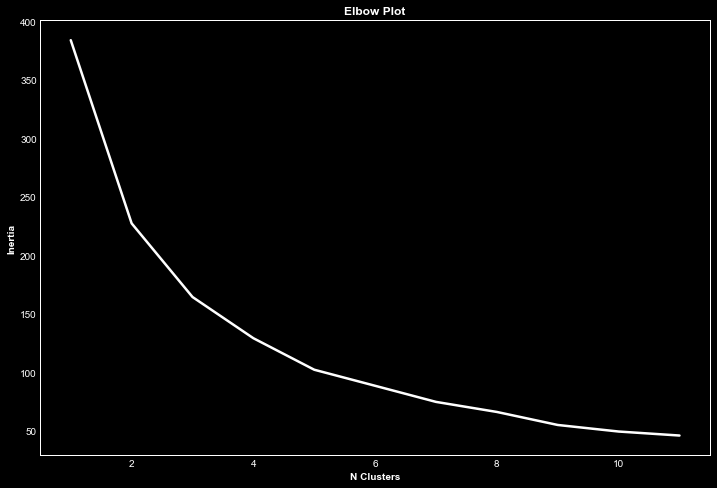

In [120]:
# Visualising the "Elbow" plot
plt.figure(figsize=(12,8))
plt.plot(range(1,12), inertia, color = 'white', lw = 2.5)
plt.title('Elbow Plot', fontweight='bold')
plt.xlabel('K Clusters', fontweight='bold')
plt.ylabel('Inertia', fontweight='bold')
plt.show()

Although there is an element of subjectivity, the optimal number of clusters is often chosen basen on the "elbow" point of the plot. This is often the point in which the inertia begins to decrease linearly.

From the above plot we can see that the optimal number of clusters, where the line begins to decrease in a more linear fashion, is from 4 onwards. Based on this, let's use 5 clusters for our algorithm.

In [121]:
# Initiliase KMeans algorithm
kmeans = KMeans(n_clusters=5)

# Fit algorithm to our data set
kmeans.fit(X)

# Retrieve the centroids
centroids = kmeans.cluster_centers_

# Retrieve the labels of our algorithm
labels = kmeans.labels_

# Form predictions
predictions = kmeans.predict(X)

In [25]:
clusters = pd.Series(index=df_new.index, data=labels)
print(clusters.value_counts())

1    29
0    11
3     4
4     2
2     2
dtype: int64


Here we can see a value count of our 5 different clusters. The two largest clusters are cluster 1 and cluster 0, containing 29 stocks and 11 stocks respectively. The third largest cluster is cluster 3 which is comprised of 4 stocks, while the last two clusters are comprised of just 2 stocks each.

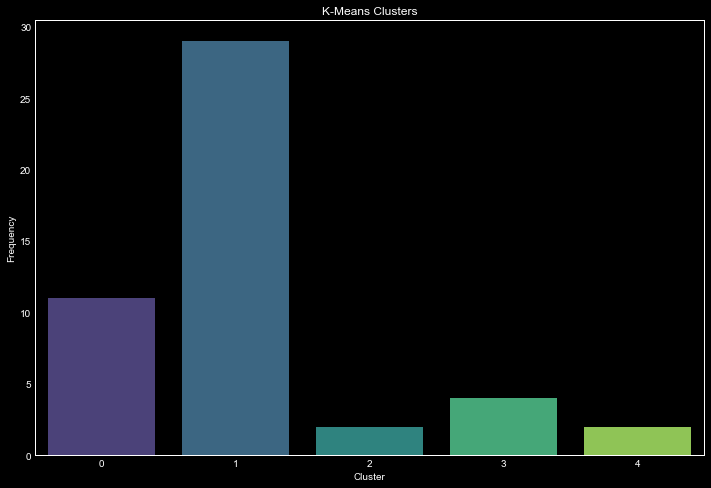

In [138]:
plt.figure(figsize=(12,8))
sns.countplot(x = clusters, palette='viridis')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('K-Means Clusters')
plt.show()

In [189]:
# Set max column output to 50 values to be able to see all stock clusters
pd.set_option('display.max_column',50)

# Creating and printing a dataframe containing each stock and its cluster
df_clusters = clusters.to_frame()
df_clusters.columns = ['cluster']

# Subset 'ticker', 'sector', and 'industry' to merge with cluster dataframe.
subset_df = df[['ticker','sector', 'industry']].set_index('ticker')

# Merge, store, and print results containing K-Means cluster, sector, and industry for all companies
final_df = pd.merge(df_clusters, subset_df, left_index=True, right_index=True)
final_df.sort_values('cluster', ascending = False)

,cluster,sector,industry
ticker,,,
PPH.NZ,4,Technology,Software—Application
FPH.NZ,4,Healthcare,Medical Instruments & Supplies
ARG.NZ,3,Real Estate,REIT—Diversified
PFI.NZ,3,Real Estate,REIT—Industrial
IPL.NZ,3,Real Estate,Real Estate Services
GMT.NZ,3,Real Estate,REIT—Industrial
ANZ.NZ,2,Financial Services,Banks—Diversified
WBC.NZ,2,Financial Services,Banks—Diversified
AIA.NZ,1,Industrials,Airports & Air Services


#### Key results of our algorithm and interpretation:
- The algorithm groups ZEL and NZR in the same cluster, which are the only 2 Energy sector stocks in our data set.
- All of the 4 companies in cluster 3 are in the Real Estate sector.
- ANZ and WBC, the only two publicly-listed commercial banks (Banks - Diversified industry) make up cluster 2.
- A decent proportion of the Healthcare and Utilities companies are grouped in cluster 1.

### 3. Principal Component Analysis 
Bonus section: Let's run a simple principal component analysis (PCA) to see how much variation can be explained by the first 5 components.

In [196]:
# Initiate PCA model with 5 components and random-state to ensure replicable results
pca = PCA(n_components=5, random_state = 42)

# Fit to our data set
X_pca = pca.fit(X).transform(X)

# Print the components and explained variance ratio
print(pca.components_)
print("-----"*15)
print(pca.explained_variance_ratio_)

[[ 0.50086172  0.48550132  0.00390032  0.49638149  0.0487108   0.50175171
   0.10364353 -0.04633243]
 [-0.0985771   0.1048554   0.40775694 -0.11692509  0.41729654 -0.10178456
   0.60170918 -0.50279247]
 [ 0.05731557 -0.02097941  0.71648294 -0.05649294 -0.59132906  0.0596815
   0.18866925  0.30150873]
 [-0.00079964 -0.0082208  -0.12689223  0.02895698 -0.59847581 -0.00321472
  -0.14228568 -0.77753636]
 [ 0.06379122  0.03804089  0.52512901 -0.10145365  0.32073203  0.1000272
  -0.74512059 -0.20087581]]
---------------------------------------------------------------------------
[0.45769935 0.2304243  0.13700832 0.08429126 0.05331161]


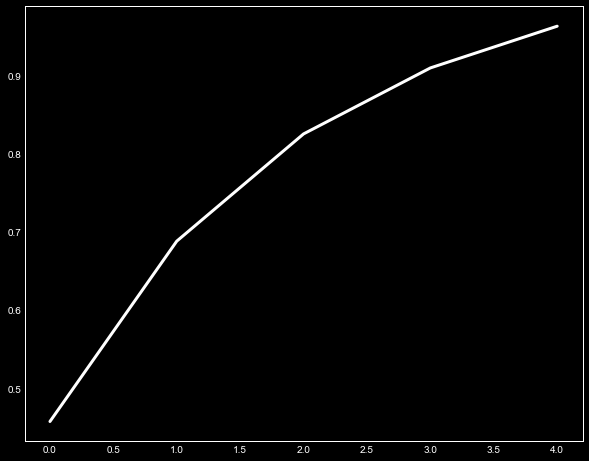

In [191]:
# PCA plot
plt.figure(figsize=(10,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color = 'white', lw = 3)
plt.show()

In [197]:
print("The explained variance ratio for first 5 components is: %s" % str(pca.explained_variance_ratio_))
print("The total explained variance ratio for first 5 components is: %s" % str(sum(pca.explained_variance_ratio_)))

The explained variance ratio for first 5 components is: [0.45769935 0.2304243  0.13700832 0.08429126 0.05331161]
The total explained variance ratio for first 5 components is: 0.9627348332684477


- We can see from the plot above that 4 components explains over 90% of the variation in our data set
- The print our statements above support this, showing that the first 5 components explain over 96% of the variation in our data set.

### 4. Summary
This research notebook provides an introduction to the application of unsupervised clustering algorithms to real world financial data. The purpose of this study was to show an innovative way that we can group unlabelled data based on the similarities of the data points - a particularly exciting area of research in quantitative financial research and trading. 

Futher areas of application:
- Iterating through the stocks in each cluster and performing Johansen Co-integration tests to determine which stocks have a long-run price/return relationship. 
- Create a z-score and spread measure between co-integrated stocks to see mean-reverting process.
- Building a statistical-arbitrage trading strategy for co-integrated pairs.